In [52]:
#Always include important imports at the top
import numpy as np #for linear algebra functions
import pandas as pd #for data processing the CSV
import random
import time

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn imports
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [53]:
# Read the dataset into a pandas DataFrame object
df = pd.read_csv("/Users/arib/Downloads/rwf577.csv")
df

,Age,Reduction,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [54]:
#Drop variables with zero variance: EmployeeCount, Over18, and StandardHours
df.drop('EmployeeCount', axis = 1, inplace = True)
df.drop('Over18', axis = 1, inplace = True)
df.drop('StandardHours', axis = 1, inplace = True)

#Replacing Yes/No in the target variable (Attrition) with 1/0
df['Reduction'] = df['Reduction'].map({'No':0, 'Yes':1})

In [55]:
df_f = df.drop(['JobLevel','TotalWorkingYears','YearsInCurrentRole', 'YearsWithCurrManager' , 'PercentSalaryHike'], axis=1)
#Confirm those variables were sucessfully dropped
df_f

,Age,Reduction,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,19479,8,Yes,3,1,0,0,1,6,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,24907,1,No,4,4,1,3,3,10,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2396,6,Yes,3,2,0,3,3,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,23159,1,Yes,3,3,0,3,3,8,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,16632,9,No,3,4,1,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,12290,4,No,3,3,1,3,3,5,0
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,21457,4,No,3,1,1,5,3,7,1
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,5174,1,Yes,4,2,1,0,3,6,0
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,13243,2,No,3,4,0,3,2,9,0


In [56]:
#Create a function which takes the dataset as input and ouputs the processed dataset
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['Education'] = le.fit_transform(res_df['Education'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['Gender'] = le.fit_transform(res_df['Gender'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
    res_df['Reduction'] = le.fit_transform(res_df['Reduction'])
    return res_df

#Run the function on the desired dataset
encoded_df = preprocessor(df_f)

In [57]:
#Selecting features
X = encoded_df.drop(['Reduction'],axis =1)
y = encoded_df['Reduction']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Reduction, Length: 1470, dtype: int64

In [58]:
#Standardizing features
sc = StandardScaler()
X = sc.fit_transform(X)

#Confirm the new mean and standard deviation of the dataset
mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))


Mean: (0, 0)
Standard deviation: (1, 1)


In [59]:

#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 40)


In [60]:
class k_means_clustering():
    def __init__(self, k = 3, max_iter = 100, epsilon = 0.01) -> None:
        self.X = None
        self.k = k
        self.max_iter = max_iter
        self.epsilon = epsilon
        self.centroid_history = None
        self.final_centroids = None

    def fit(self, X):
        self.X = X
        C_old = self.initialize_centroids()
        C_new = self.new_centroids(C_old)
        self.centroid_history = [C_old, C_new]
        centroid_distances = [self.distance(p[0], p[1]) for p in zip(C_old, C_new)]

        iter = 0
        while max(centroid_distances) > self.epsilon and iter<self.max_iter:
            C_old, C_new = C_new, self.new_centroids(C_new)
            self.centroid_history.append(C_new)
            centroid_distances = [self.distance(p[0], p[1]) for p in zip(C_old, C_new)]
            iter += 1
        self.final_centroids = C_new

    def initialize_centroids(self):
        centroids = []
        for _ in range(self.k):
            i = np.random.randint(len(self.X))
            centroids.append(self.X[i, :])
        return centroids

    def new_centroids(self, centroids):
        new_centroids = []
        A = self.make_classes(centroids)
        for i in range(len(centroids)):
            if len(A[i])>0:
                new_centroids.append(1/len(A[i])*sum(A[i])) 
        return new_centroids
    def distance(self, a, b):
        return np.sqrt((a-b)@(a-b))

    def clustering(self, x, centroids):
        distances = np.array([self.distance(x, centroid) for centroid in centroids])
        return np.argmin(distances)

    def make_classes(self, centroids):
        A = dict()
        for i in range(len(centroids)):
            A[i] = []
        for x in self.X:
            A[self.clustering(x, centroids)].append(x)
        return A

    def predict_classes(self, data, centroids):
        A = dict()
        for i in range(len(centroids)):
            A[i] = []
        for x in data:
            A[self.clustering(x, centroids)].append(x)
        return A
    
    def mse_classes(self, centroids):
        errors = []
        A_classes = self.make_classes(centroids)
        for i, centroid in enumerate(centroids):
            error = sum(.5*(centroid-a)@(centroid-a) for a in A_classes[i])
            errors.append(error)
        return sum(errors)


In [61]:
X = np.asarray(encoded_df[['MonthlyIncome','YearsAtCompany']])

[array([4315.21578947,    5.58421053]), array([1.40604939e+04, 1.19272727e+01])]


Text(0, 0.5, 'YearsAtCompany')

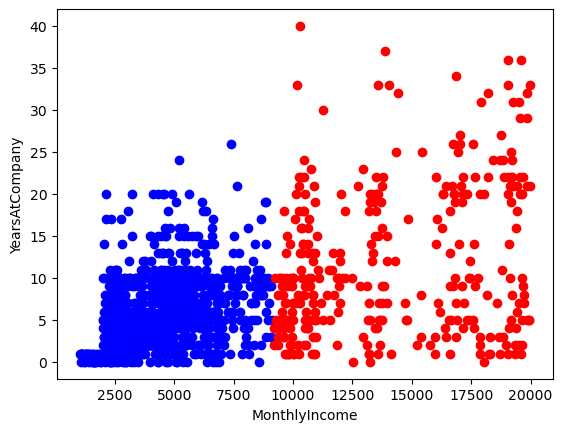

In [62]:

k_means = k_means_clustering(k=2, max_iter=100, epsilon=0.01)
k_means.fit(X)

centroids = k_means.final_centroids
print(centroids)

clusters = k_means.predict_classes(X, k_means.final_centroids)
for label, _ in clusters.items():
    for x in clusters[label]:
        if label == 0:
            plt.scatter(x[0],x[1],color = "blue")
        else:
            plt.scatter(x[0],x[1],color = "red")
plt.xlabel('MonthlyIncome')
plt.ylabel("YearsAtCompany")


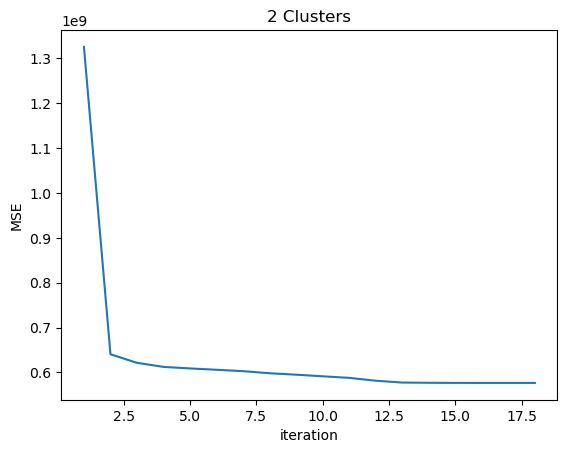

Centroids for 2 clusters: [array([2727.16007194,    4.11870504]), array([5392.86004057,    6.6673428 ]), array([1.81432946e+04, 1.41705426e+01]), array([9.33399526e+03, 9.13744076e+00]), array([1.32638272e+04, 1.19629630e+01])]
MSE for 2 clusters: 576621216.619


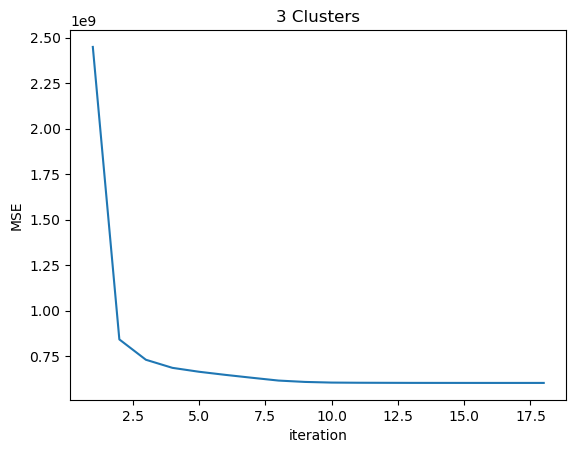

Centroids for 3 clusters: [array([1.79638613e+04, 1.38686131e+01]), array([7269.58078603,    7.28384279]), array([4822.39467312,    6.57384988]), array([1.13443245e+04, 1.06968085e+01]), array([2602.67196819,    3.99204771])]
MSE for 3 clusters: 602839915.87


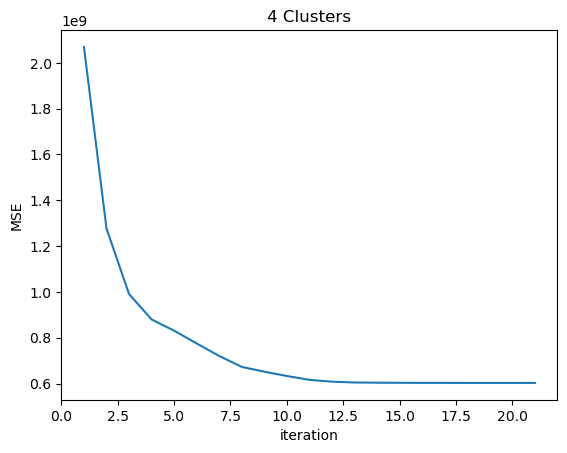

Centroids for 4 clusters: [array([1.13443245e+04, 1.06968085e+01]), array([4822.39467312,    6.57384988]), array([2602.67196819,    3.99204771]), array([7269.58078603,    7.28384279]), array([1.79638613e+04, 1.38686131e+01])]
MSE for 4 clusters: 602839915.87


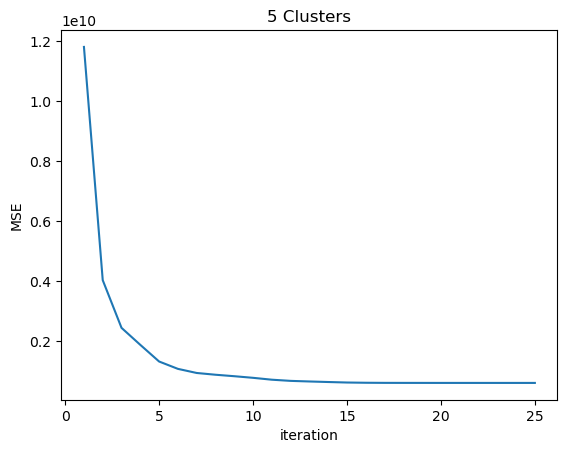

Centroids for 5 clusters: [array([4822.39467312,    6.57384988]), array([1.79638613e+04, 1.38686131e+01]), array([2602.67196819,    3.99204771]), array([7269.58078603,    7.28384279]), array([1.13443245e+04, 1.06968085e+01])]
MSE for 5 clusters: 602839915.87


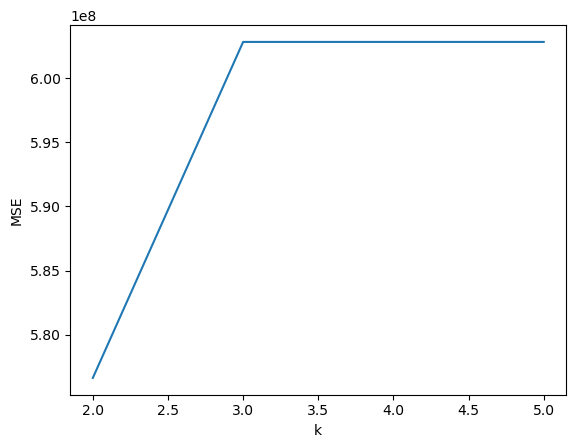

In [63]:

def k_means_compare(k, max_iter, epsilon):
    mse_list = []
    
    for j in range(1,k):
        k_means = k_means_clustering(k, max_iter, epsilon)
        k_means.fit(X)
        
        centroids = k_means.final_centroids
        mse = k_means.mse_classes(centroids)
        mse_list.append(mse)
        errors = [k_means.mse_classes(centroid) for centroid in k_means.centroid_history]
        
        #plot the MSE for a given k over a given number of iterations
        plt.figure()
        plt.plot([i for i in range(1,len(errors)+1)], errors)
        plt.title(f'{j+1} Clusters')
        plt.xlabel('iteration')
        plt.ylabel("MSE")
        plt.show()
        
        print("Centroids for", j + 1, "clusters:", centroids)
        print("MSE for", j + 1, "clusters:", round(mse, 3))

    #plot the MSE over the values of k to determine which k is best
    plt.figure()
    plt.plot([i for i in range(2,len(mse_list)+2)], mse_list)
    plt.xlabel('k')
    plt.ylabel("MSE")
    plt.show()
        
#calling the function                
k_means_compare(5, 100, 0.01)


In [64]:

#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 40)


     

In [65]:
# Make an instance of the model and specify that 90% of the variance needs to be retained
n = 90
pca = PCA(n/100)

# Fit the PCA on the training set
pca.fit(X_train)

print('To retain',n,'% of the variation, we needed',pca.n_components_,'components')


     

To retain 90 % of the variation, we needed 1 components


In [66]:

# Applying transformation to both Training and Test set

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


In [67]:

#create a list of the weighted cluster sum of squares
wcss = []
for i in range(1,11):
    #initiate the model
    k_means = KMeans(n_clusters=i,random_state=40)
    #fit the model with the data
    k_means.fit(X_train, y_train)
    wcss.append(k_means.inertia_)



Text(0, 0.5, 'weighted cluster sum of squares')

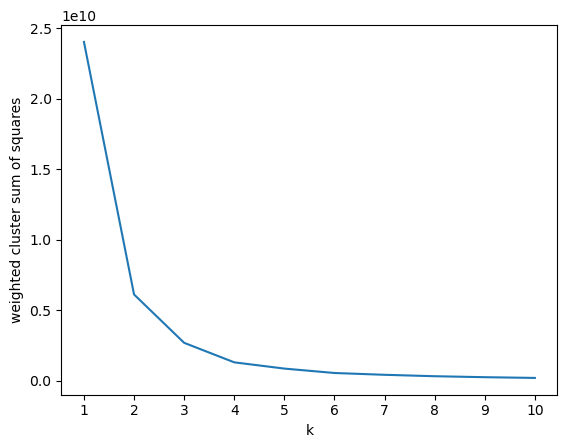

In [68]:

#Visualize the sum of squares for a variety of k values to assess which k is best
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11));
plt.xlabel('k')
plt.ylabel('weighted cluster sum of squares')

In [70]:

#K-means without PCA

start = time.time()

#initiate the model
k_means = KMeans(n_clusters=4,random_state=40)
#fit the model with the data
k_means.fit(X_train, y_train)

end = time.time()
kmeans_time = end-start
print('Train Time (seconds) of K-Means Clustering without PCA:', kmeans_time)

y_pred_kmeans = k_means.predict(X_test)



Train Time (seconds) of K-Means Clustering without PCA: 0.04796957969665527


In [72]:



#K-means with PCA
start = time.time()

kmeans_pca = KMeans(n_clusters=4,random_state=40)
kmeans_pca.fit(X_train_pca,y_train)

end = time.time()
kmeans_time_pca = end-start
print('Train Time (seconds) of K-Means Clustering with PCA:', kmeans_time_pca)

y_pred_kmeans_pca = kmeans_pca.predict(X_test_pca)


Train Time (seconds) of K-Means Clustering with PCA: 0.05069112777709961
